# TMDb Movie Analysis

### Overview and Notes
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
 ● Certain columns, like ‘cast’and ‘genres’, contain multiple
values separated by pipe (|)characters.
 ● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
 ● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars,accounting for inflation over time.

### Question 1
How the movies released under top 3 genres changed over the decades?

#### Step 1: Import libraries and Load data

In [1]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the csv file and check
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


#### Step 2: Remove Duplicates and NA values

In [3]:
# view missing value count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

For Question 1, we need the columns { id, release_year and Genres } to be non-null. id and release_year columns do not have any null values and genres has null values but, it will be eliminated during split which will be done later. 
For Question 2, we needs the columns { popularity, runtime, vote_average, budget_adj and revenue_adj } and none of them has null values.
So, dropna is not necessary.

In [4]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [5]:
# check if there are any duplicates
df.duplicated().value_counts()

False    10865
True         1
dtype: int64

In [6]:
# drop duplicates and check again
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

False    10865
dtype: int64

In [7]:
# drop na values from genres columns and check again
df_g = df.dropna(subset=['genres'])
df_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
id                      10842 non-null int64
imdb_id                 10834 non-null object
popularity              10842 non-null float64
budget                  10842 non-null int64
revenue                 10842 non-null int64
original_title          10842 non-null object
cast                    10767 non-null object
homepage                2931 non-null object
director                10800 non-null object
tagline                 8036 non-null object
keywords                9367 non-null object
overview                10839 non-null object
runtime                 10842 non-null int64
genres                  10842 non-null object
production_companies    9826 non-null object
release_date            10842 non-null object
vote_count              10842 non-null int64
vote_average            10842 non-null float64
release_year            10842 non-null int64
budget_adj              1

For Question 1, we need the columns { id, release_year and Genres } to be non-null. id and release_year columns do not have any null values and genres has null values and dropna is used to remove them. For Question 2, we needs the columns { popularity, runtime, vote_average, budget_adj and revenue_adj } and none of them has null values. So, dropna is not necessary.

#### Step 3: Prepare data for plot

In [8]:
# split the genres column and serialize it
df_g = df.genres.str.split('|').apply(pd.Series).merge(df[['id', 'release_year']], right_index = True, left_index = True).melt(id_vars = ['id', 'release_year'], value_name = "genre").drop("variable", axis = 1).dropna() 
df_g.head()

,id,release_year,genre
0,135397,2015,Action
1,76341,2015,Action
2,262500,2015,Adventure
3,140607,2015,Action
4,168259,2015,Action


In [9]:
# check if the split is done properly
print(df.query('id == 135397')['genres'])
df_g.query('id == 135397')

0    Action|Adventure|Science Fiction|Thriller
Name: genres, dtype: object


,id,release_year,genre
0,135397,2015,Action
10865,135397,2015,Adventure
21730,135397,2015,Science Fiction
32595,135397,2015,Thriller


In [10]:
# Slice the release_year column to decade bins
bin_edges = [1959,1969,1979,1989,1999,2009,2019]
bin_names = ['1960s','1970s','1980s','1990s','2000s','2010s']
df_g['decade'] = pd.cut(df_g['release_year'], bin_edges, labels=bin_names)
df_g.tail()

,id,release_year,genre,decade
54286,2661,1966,Crime,1960s
54294,5923,1966,Romance,1960s
54302,29710,1966,Action,1960s
54309,26268,1966,Mystery,1960s
54310,15347,1966,Foreign,1960s


In [11]:
# Get the count of movies for every decade and Genre
df_count = df_g.groupby(['decade', 'genre'], as_index=False).agg({"id": "nunique"})
df_count.head()

,decade,genre,id
0,1960s,Action,78
1,1960s,Adventure,64
2,1960s,Animation,16
3,1960s,Comedy,113
4,1960s,Crime,43


In [12]:
# see which genres are most popular
df_count.groupby('genre')['id'].sum()

genre
Action             2384
Adventure          1471
Animation           699
Comedy             3793
Crime              1354
Documentary         520
Drama              4760
Family             1231
Fantasy             916
Foreign             188
History             334
Horror             1637
Music               408
Mystery             810
Romance            1712
Science Fiction    1229
TV Movie            167
Thriller           2907
War                 270
Western             165
Name: id, dtype: int64

In [13]:
# take only top 3 most popular genres to plot for every decade
popular = ['Drama', 'Comedy', 'Thriller']
df_count.query("genre in " + str(popular))

,decade,genre,id
3,1960s,Comedy,113
6,1960s,Drama,168
17,1960s,Thriller,64
23,1970s,Comedy,122
26,1970s,Drama,239
37,1970s,Thriller,148
43,1980s,Comedy,428
46,1980s,Drama,423
57,1980s,Thriller,260
63,1990s,Comedy,737


#### Step 4: Plot

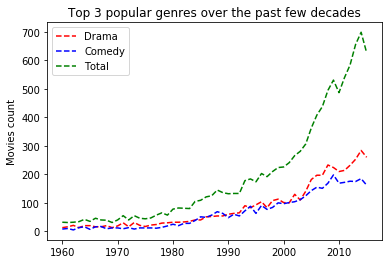

In [14]:
# Plot Line chart to compare the total count of movies with popular genres
xl = df_g.release_year.sort_values().unique()
yl_total = np.array(df_g.groupby('release_year', as_index=False).agg({"id": "nunique"}).sort_values(by='release_year')['id'])
yl_drama = np.array(df_g.query("genre == 'Drama'").groupby('release_year', as_index=False).agg({"id": "nunique"}).sort_values(by='release_year')['id'])
yl_comedy = np.array(df_g.query("genre == 'Comedy'").groupby('release_year', as_index=False).agg({"id": "nunique"}).sort_values(by='release_year')['id'])

l1 = plt.plot(xl, yl_drama, 'r--', label='Drama')
l2 = plt.plot(xl, yl_comedy, 'b--', label='Comedy')
lt = plt.plot(xl, yl_total, 'g--', label='Total') 

plt.ylabel('Movies count')
plt.title('Top 3 popular genres over the past few decades')
plt.legend((l1[0], l2[0], lt[0]), ('Drama', 'Comedy', 'Total'))
plt.show()

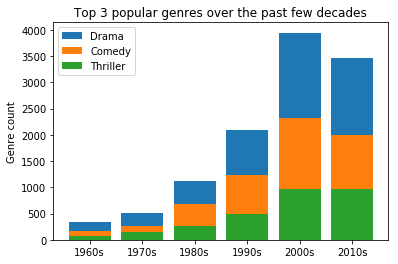

In [15]:
# plot stacked bar char only for popular genres
xb = df_count.decade.unique().sort_values()
yb_drama = np.array(df_count.query("genre == 'Drama'").sort_values(by='decade')['id'])
yb_comedy = np.array(df_count.query("genre == 'Comedy'").sort_values(by='decade')['id'])
yb_thriller = np.array(df_count.query("genre == 'Thriller'").sort_values(by='decade')['id'])

# Thiller stacked at bottom and Comedy at the middle so add thiller to it
# Simillarly add both comedy and thiller to Drama so that it can be stacked on top of both
yb_drama = yb_drama + yb_comedy + yb_thriller
yb_comedy = yb_comedy + yb_thriller

p1 = plt.bar(xb, yb_drama)
p2 = plt.bar(xb, yb_comedy)
p3 = plt.bar(xb, yb_thriller)

plt.ylabel('Genre count')
plt.title('Top 3 popular genres over the past few decades')
plt.legend((p1[0], p2[0], p3[0]), ('Drama', 'Comedy', 'Thriller'))
plt.show()

#### Step 5: Conclusion

From the plot above, we could conclude that number of Drama movies trends to grow more compared to comedy and thriller from the past few decades. Also, note that the data for 2010s is not complete and it represented only with the data available to us.

### Question 2
What kinds of properties are associated with movies that have high revenues?

In [16]:
% matplotlib inline

In [17]:
# Check how the data is distributed
df[['revenue_adj','budget_adj','vote_average','popularity','runtime']].describe()

,revenue_adj,budget_adj,vote_average,popularity,runtime
count,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000
mean,5.136900e+07,1.754989e+07,5.975012,0.646446,102.071790
std,1.446383e+08,3.430753e+07,0.935138,1.000231,31.382701
min,0.000000e+00,0.000000e+00,1.500000,0.000065,0.000000
25%,0.000000e+00,0.000000e+00,5.400000,0.207575,90.000000
50%,0.000000e+00,0.000000e+00,6.000000,0.383831,99.000000
75%,3.370173e+07,2.085325e+07,6.600000,0.713857,111.000000
max,2.827124e+09,4.250000e+08,9.200000,32.985763,900.000000


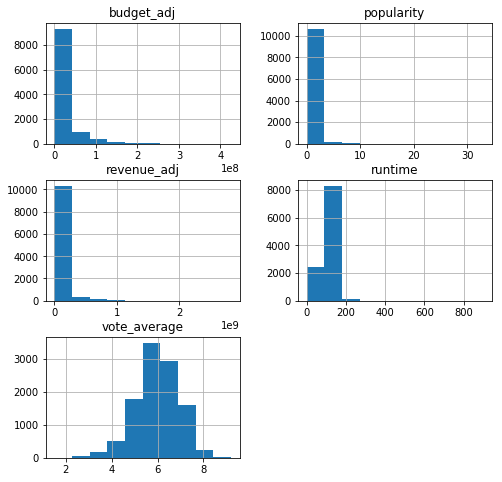

In [18]:
# See how the data is skewed
df[['revenue_adj','budget_adj','vote_average','popularity','runtime']].hist(figsize=(8,8));

From the describe data, we could see that 75% of the Revenue is about 34 million. From the histogram we could see that most of the movies are below 150 million with very few movies over it. So we can plot without these anomalies to see the trend better. 

In [19]:
# Removing anomalies with revenue before comparing it with other properties
df_a = df.query('revenue_adj < 150000000')

#### Finding co-relation between Revenue and Budget

From the describe data, we could see that 75% of the budget is about 20 million. From the histogram we could see that most of the movies are below 200 million with very few movies over it. So we can plot without these anomalies to see the trend better. 

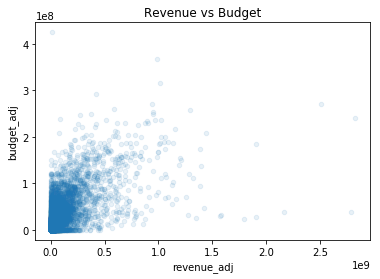

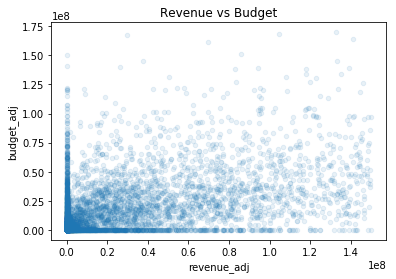

In [20]:
df.plot(x='revenue_adj', y='budget_adj', kind='scatter', title='Revenue vs Budget', alpha=0.1);
df_a.query('budget_adj < 200000000').plot(x='revenue_adj', y='budget_adj', kind='scatter', title='Revenue vs Budget', alpha=0.1);

#### Finding co-relation between Revenue and Vote average

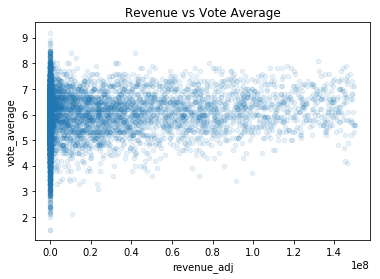

In [21]:
df_a.plot(x='revenue_adj', y='vote_average', kind='scatter', title='Revenue vs Vote Average', alpha=0.1);

#### Finding co-relation between Revenue and Popularity

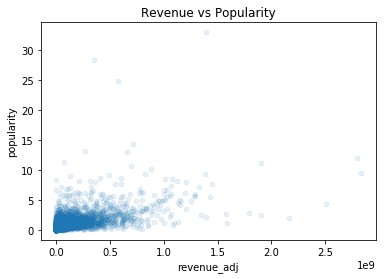

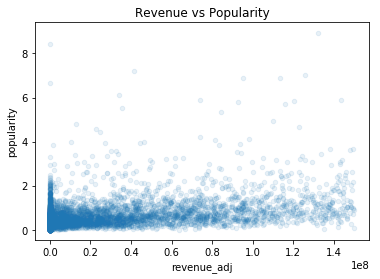

In [22]:
df.plot(x='revenue_adj', y='popularity', kind='scatter', title='Revenue vs Popularity', alpha=0.1);
df_a.query('popularity < 10').plot(x='revenue_adj', y='popularity', kind='scatter', title='Revenue vs Popularity', alpha=0.1);

Simillarly, plotting without anomalies.

#### Finding co-relation between Revenue and Runtime

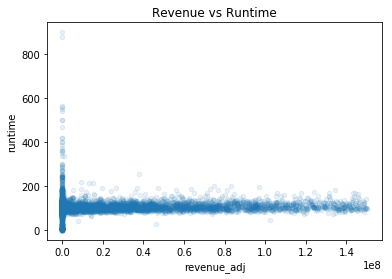

In [24]:
df_a.plot(x='revenue_adj', y='runtime', kind='scatter', title='Revenue vs Runtime', alpha=0.1);

#### Conclusion
From the above scatter plots, we could conclude that revenue is not associated to any of the properties (Budget, Vote average, Popularity and Runtime). i.e. Revenue didn't tend to increase or decrease with the properties compared. It tends to distribute almost evenly for all the properties. Hence, we can conculde that Budget, Vote average, Popularity and Runtime are not co-related to Revenue